In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd
plt.rcParams['figure.figsize'] = (20, 12)

In [30]:
df = pd.read_csv('rm_crop_yields_1938_2021.csv')

In [31]:
gdf = gpd.read_file('Rural Municipality.shp')

gdf['RMNO']=gdf['RMNO'].astype('int')
gdf['RMNM']=gdf['RMNM'].astype('string')

gdf.rename(columns=
{
    'RMNO': 'RM',
    'RMNM': 'Municipality'
}, inplace=True)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25017 entries, 0 to 25016
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          25017 non-null  int64  
 1   RM            25017 non-null  int64  
 2   Winter Wheat  3037 non-null   float64
 3   Canola        14008 non-null  float64
 4   Spring Wheat  24924 non-null  float64
 5   Mustard       4487 non-null   float64
 6   Durum         11581 non-null  float64
 7   Sunflowers    946 non-null    float64
 8   Oats          23913 non-null  float64
 9   Lentils       5515 non-null   float64
 10  Peas          8134 non-null   float64
 11  Barley        24703 non-null  float64
 12  Fall Rye      15847 non-null  float64
 13  Canary Seed   3819 non-null   float64
 14  Spring Rye    805 non-null    float64
 15  Tame Hay      4205 non-null   float64
 16  Flax          20934 non-null  float64
 17  Chickpeas     960 non-null    float64
dtypes: float64(16), int64(2)
m

In [33]:
df['RM'].unique().size

299

In [34]:
gdf['RM'].unique().size

298

In [35]:
df['RM'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  17,
        18,  19,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  42,
        43,  44,  45,  46,  49,  51,  61,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141,
       142, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 171, 181, 183, 184, 185, 186,
       187, 189, 190, 191, 193, 194, 211, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232,
       241, 243, 244, 245, 246, 247, 248, 250, 251, 252, 253, 254, 255,
       256, 257, 259, 260, 261, 271, 273, 274, 275, 276, 277, 278, 279,
       280, 281, 282, 283, 284, 285, 286, 287, 288, 290, 292, 30

In [36]:
## RM in crop but not in gdf
new_df = df[~df['RM'].isin(gdf['RM'].unique())]

In [37]:
new_df['RM'].unique()

array([278, 408, 529])

In [38]:
df['Year'].unique().size

84

In [39]:
df['Year'].min()

1938

In [40]:
df['Year'].max()

2021

In [41]:
df.isna().sum()

Year                0
RM                  0
Winter Wheat    21980
Canola          11009
Spring Wheat       93
Mustard         20530
Durum           13436
Sunflowers      24071
Oats             1104
Lentils         19502
Peas            16883
Barley            314
Fall Rye         9170
Canary Seed     21198
Spring Rye      24212
Tame Hay        20812
Flax             4083
Chickpeas       24057
dtype: int64

## What is the crop with most yield over the years?

In [42]:
df_sum_all = df.sum().to_frame()
df_sum_all

,0
Year,49518298.00
RM,6228170.00
Winter Wheat,116145.51
Canola,338248.32
Spring Wheat,642509.15
Mustard,3787862.38
Durum,336131.91
Sunflowers,655227.90
Oats,1126408.31
Lentils,6462360.35


In [43]:
df_sum_all.columns =['Total']
df_sum_all.drop(labels=['Year','RM'],axis=0,inplace=True)
df_sum_all

,Total
Winter Wheat,116145.51
Canola,338248.32
Spring Wheat,642509.15
Mustard,3787862.38
Durum,336131.91
Sunflowers,655227.90
Oats,1126408.31
Lentils,6462360.35
Peas,251926.10
Barley,939260.03


<AxesSubplot:ylabel='Total'>

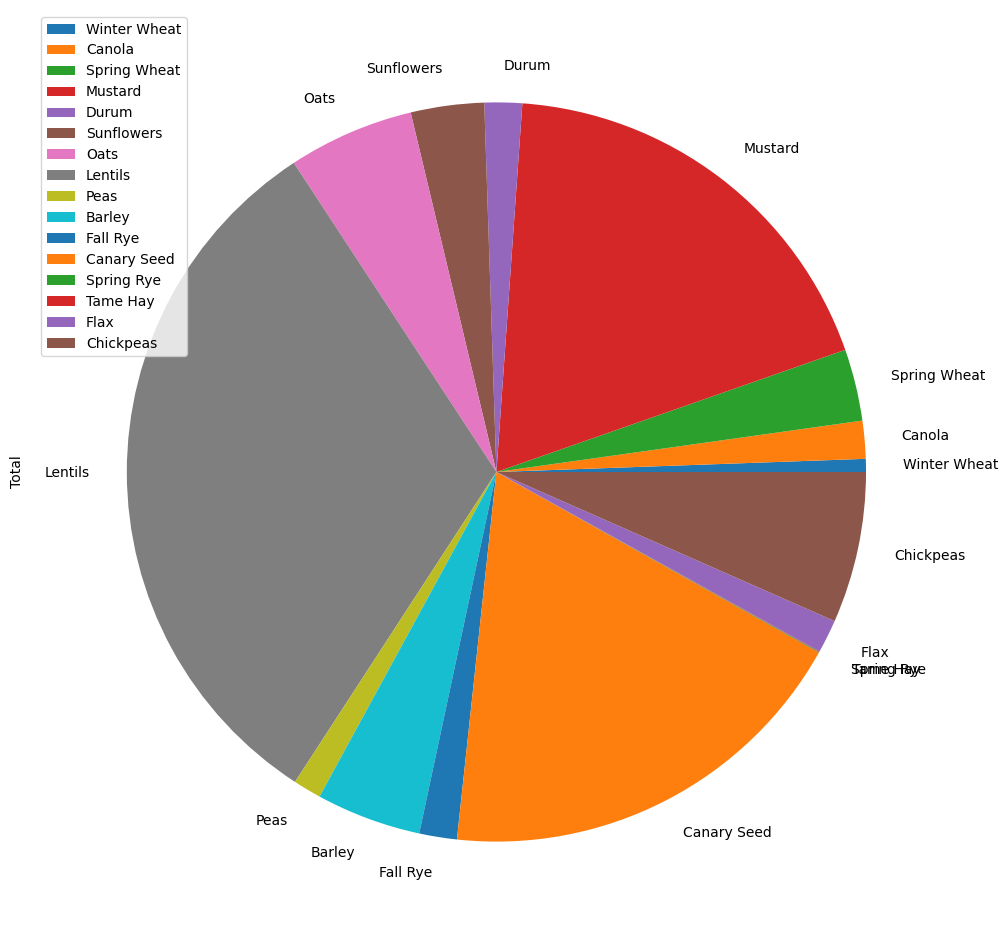

In [92]:
df_sum_all.plot.pie(y='Total')

## Which year has the most yield?

In [45]:
df_sum_all_by_year = df.groupby('Year').sum()
df_mean_all_by_year = df.groupby('Year').mean()

In [46]:
df_sum_all_by_year.drop(labels=['RM'],axis=1,inplace=True)
df_mean_all_by_year.drop(labels=['RM'],axis=1,inplace=True)

In [ ]:
df_sum_all_by_year.plot()
df_mean_all_by_year.plot()

## total column gets sum of all crops by year

In [47]:
df_sum_all_by_year['Total'] = df_sum_all_by_year.sum(axis=1)
df_mean_all_by_year['Total'] = df_mean_all_by_year.sum(axis=1)

<AxesSubplot:xlabel='Year'>

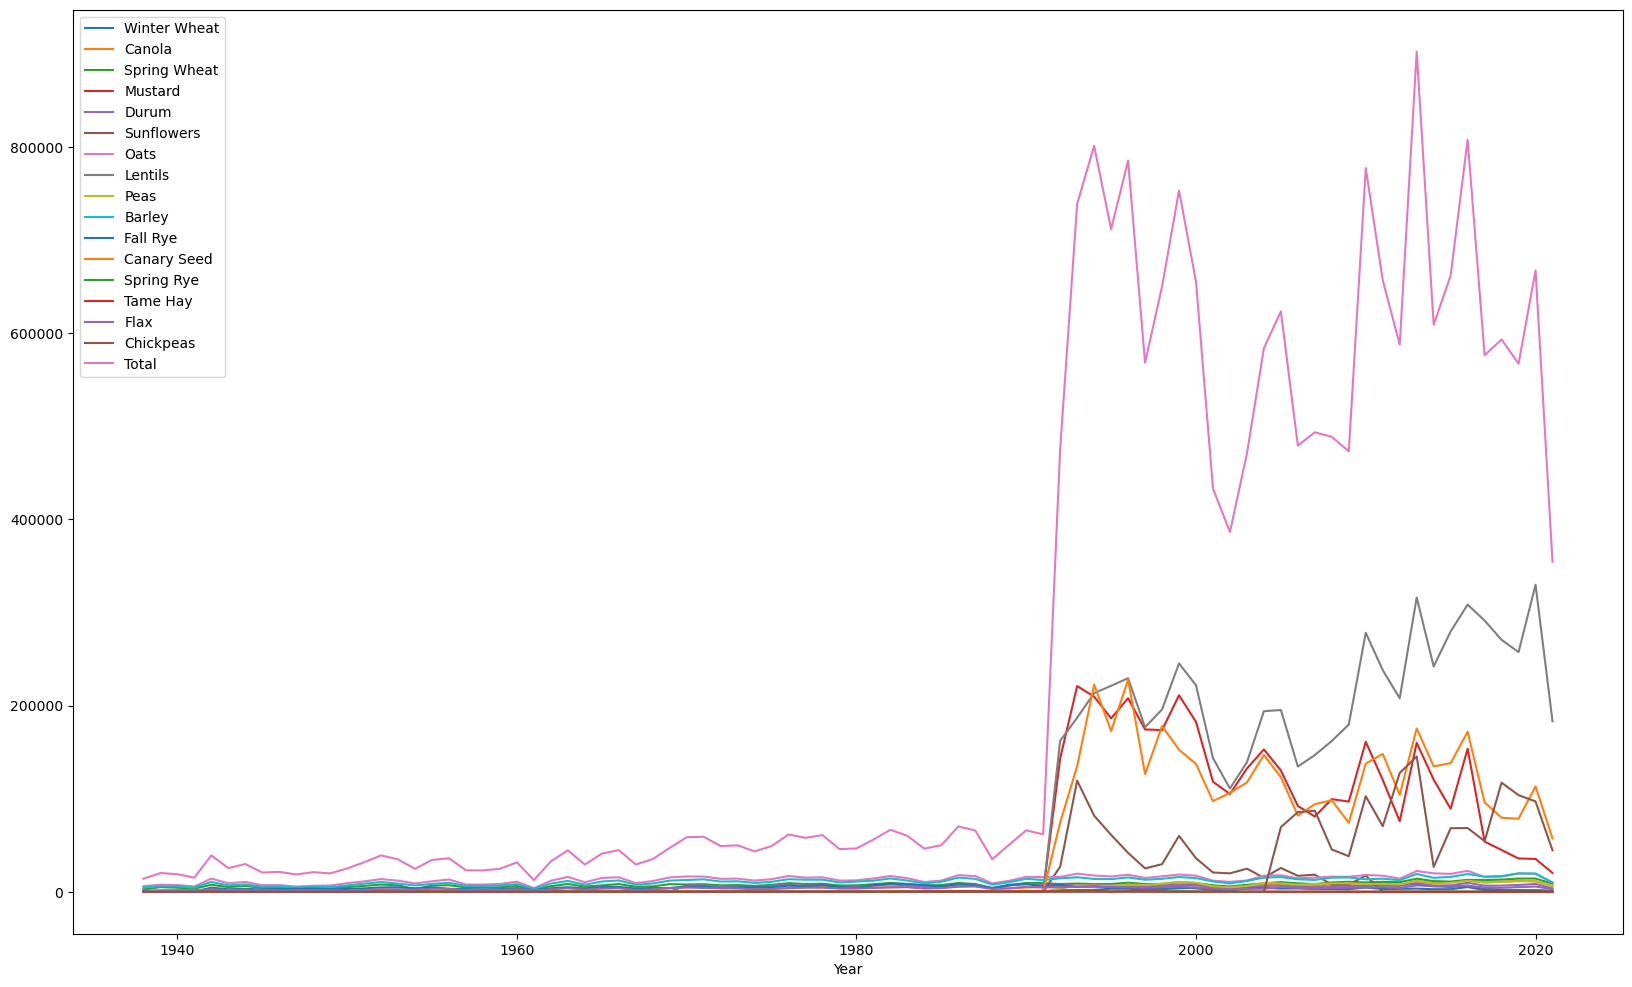

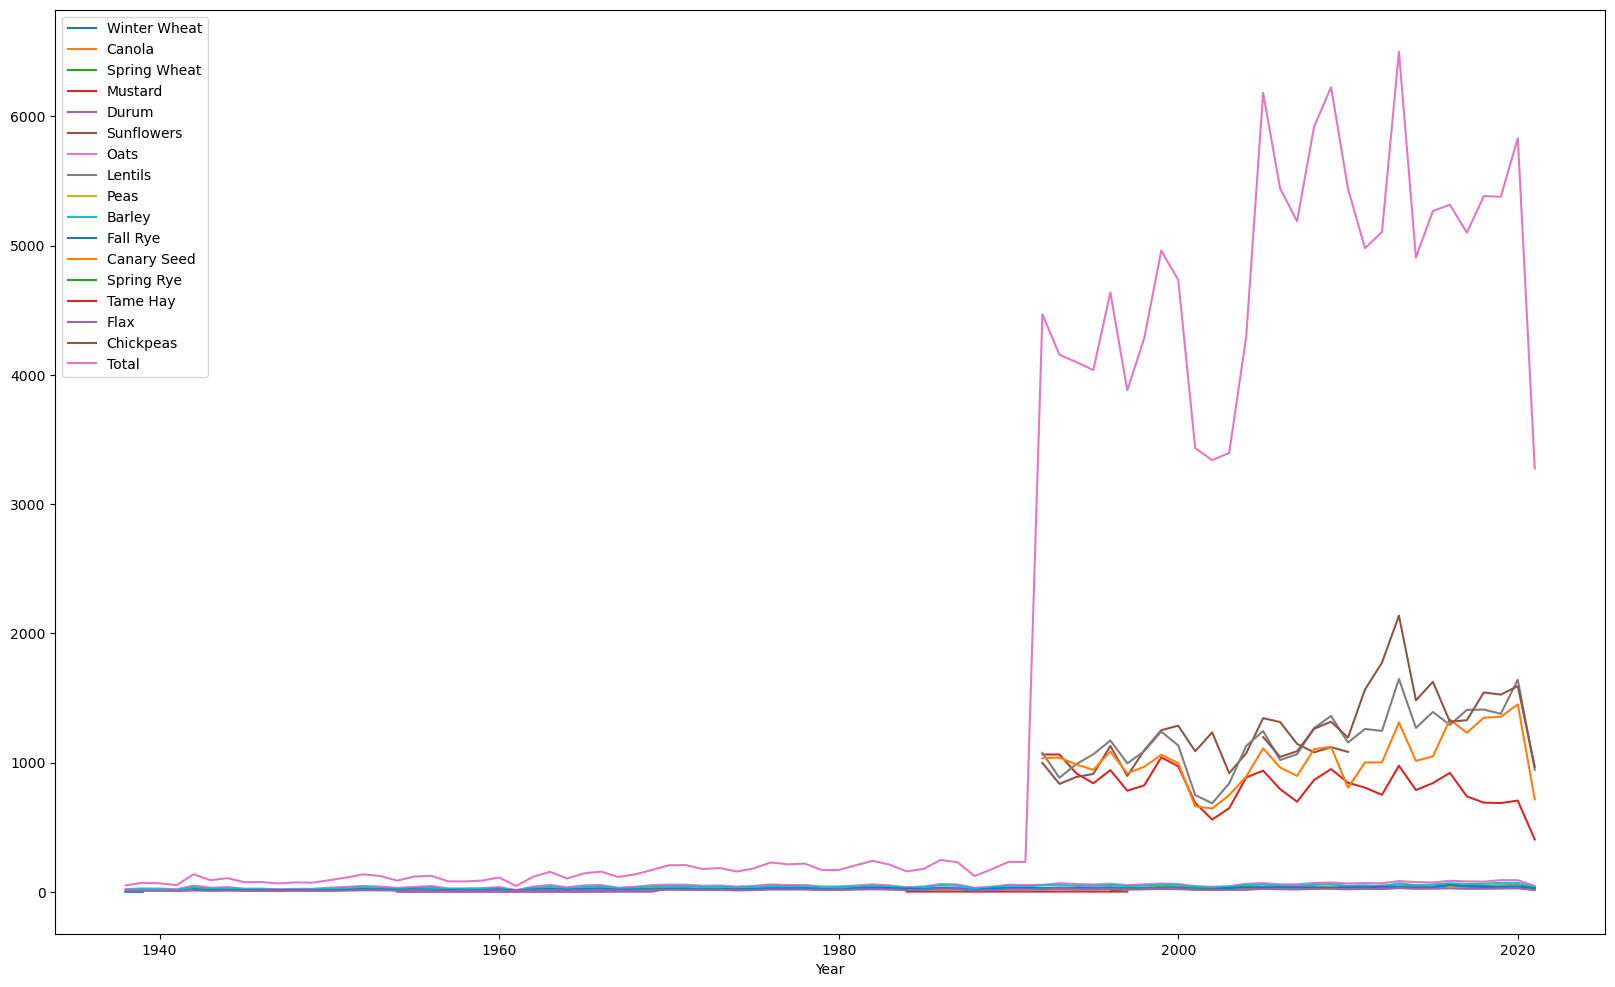

In [94]:
df_sum_all_by_year.plot()
df_mean_all_by_year.plot()

In [49]:
df_sum_all_by_year.describe()

,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas,Total
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.00000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,1382.684643,4026.765714,7648.918452,45093.599762,4001.570357,7800.332143,13409.622738,76932.86131,2999.120238,11181.667024,4004.253452,45243.339405,72.601190,59.146310,3560.689762,16092.121071,243509.293571
std,2199.848889,3567.187409,2638.262135,69566.138052,3306.438892,19560.959383,4186.127950,109358.90727,4228.796445,3882.903944,1954.958747,66034.206393,229.829802,137.200444,1390.712973,35273.710127,287501.628280
min,0.000000,0.000000,2528.000000,0.000000,0.000000,0.000000,3801.000000,0.00000,0.000000,3136.000000,0.000000,0.000000,0.000000,0.000000,915.000000,0.000000,12441.000000
25%,0.000000,0.000000,5880.500000,0.000000,0.000000,0.000000,10463.800000,0.00000,0.000000,8317.250000,2823.675000,0.000000,0.000000,0.000000,2522.250000,0.000000,32425.750000
50%,0.000000,4183.250000,7760.500000,0.000000,5364.250000,0.000000,14107.500000,0.00000,0.000000,11363.400000,3796.900000,0.000000,0.000000,0.000000,3609.850000,0.000000,53354.965000
75%,2424.225000,6335.900000,9230.325000,93311.450000,6786.275000,0.000000,16381.750000,180504.50000,7300.750000,13860.525000,5000.575000,97515.250000,0.000000,0.000000,4671.325000,0.000000,512122.225000
max,8081.600000,12190.300000,14177.500000,220951.000000,9628.400000,119341.000000,22420.500000,329838.00000,11881.800000,19754.200000,8772.000000,227862.000000,1288.200000,497.050000,6823.900000,145301.000000,902643.700000


In [50]:
df_mean_all_by_year.describe()

,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas,Total
count,30.000000,70.000000,84.000000,30.000000,70.000000,20.000000,84.000000,30.000000,30.000000,84.000000,82.000000,30.000000,12.000000,15.000000,84.000000,17.000000,84.000000
mean,37.073273,18.571337,25.853465,819.977109,22.155929,1033.811479,48.029086,1167.281144,30.814901,38.155207,23.041954,1025.529175,21.159460,1.188036,14.493611,1408.679373,1817.675771
std,7.238132,11.656730,9.184752,149.909920,14.618342,284.939711,17.409088,230.044456,6.281818,13.676048,9.581568,203.516370,10.463824,0.417016,5.951491,292.855023,2325.971906
min,24.731579,0.000000,8.454849,404.220000,0.000000,0.000000,12.712375,684.456790,16.968841,10.488294,0.000000,643.915152,0.000000,0.000000,4.716495,966.934783,44.355188
25%,29.840051,14.950204,19.667224,713.237295,3.312189,916.190299,35.936862,1030.336429,27.128319,27.816890,15.838662,922.957763,16.821429,1.104214,9.192450,1197.068966,115.404364
50%,38.211848,19.870898,25.954849,831.272834,26.297713,1084.730263,48.067321,1162.628975,30.544202,38.471663,22.930124,1006.728288,24.585754,1.209000,13.954993,1327.360000,193.759512
75%,41.855128,24.968688,30.896747,933.017070,31.911292,1166.562500,57.695400,1285.108250,34.794224,47.080741,30.158516,1107.896751,27.880692,1.370314,19.459965,1565.000000,4287.048568
max,55.597458,42.180969,49.443357,1062.264423,48.573936,1343.578947,89.418265,1646.625000,41.113495,68.590972,51.662887,1450.705128,31.983333,1.675322,27.966803,2136.779412,6501.200339


## year with most yield

In [51]:
df_sum_all_by_year.nlargest(10,'Total')

,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas,Total
Year,,,,,,,,,,,,,,,,,
2013,8081.60,11111.40,13992.30,159993.00,9131.90,0.0,22252.90,316152.00,11881.8,19110.10,3338.80,175473.00,0.0,0.00,6823.90,145301.00,902643.70
2016,6560.50,12190.30,12768.90,153649.00,9628.40,0.0,22420.50,308532.00,11653.1,18983.40,5011.30,171916.00,0.0,0.00,6398.60,68425.00,808137.00
1994,1983.00,6083.40,8213.70,209619.00,7347.50,81716.0,17371.40,213456.00,6687.3,13718.00,5790.10,222530.00,1288.2,326.68,5292.20,0.00,801422.48
1996,3234.30,6627.20,9666.40,207948.00,7532.90,41730.0,18301.50,229440.50,7619.2,15354.40,4388.00,227862.00,592.3,403.10,4878.70,0.00,785578.50
2010,6757.90,8678.10,10039.80,161117.00,6435.80,17316.0,18018.50,278269.00,8330.8,13370.70,4504.80,137704.00,29.5,0.00,4388.70,102599.00,777559.60
1999,3640.10,7640.20,10058.30,211076.30,7165.40,60008.8,18482.30,245271.40,10584.4,15825.80,5057.70,152640.10,575.7,0.00,5455.40,0.00,753481.90
1993,1781.20,6237.60,8786.90,220951.00,6887.80,119341.0,19441.50,186940.00,6670.7,15514.80,4966.60,135011.00,1057.9,241.80,5299.10,0.00,739128.90
1995,3270.90,5628.10,8343.20,186338.00,6787.70,61088.0,16420.00,221261.00,6448.3,13560.70,4667.30,172663.00,0.0,338.42,5099.80,0.00,711914.42
2020,1578.40,11088.00,14140.80,35248.00,8320.90,0.0,19247.80,329838.00,11404.9,19541.80,1399.40,113155.00,0.0,0.00,5532.70,97056.00,667551.70


In [52]:
df_mean_all_by_year.nlargest(10,'Total')

,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas,Total
Year,,,,,,,,,,,,,,,,,
2013,45.918182,38.183505,47.431525,975.567073,48.573936,NaN,82.418148,1646.625000,41.113495,65.222184,35.901075,1309.500000,NaN,NaN,27.966803,2136.779412,6501.200339
2009,38.265766,32.690076,37.230556,949.313725,35.851190,1118.571429,71.133778,1360.704545,34.755939,57.898864,30.619767,1121.863636,NaN,NaN,22.283511,1316.103448,6227.286230
2005,38.188660,29.785145,35.318430,937.338129,36.287701,1343.578947,66.676604,1243.636943,33.600758,54.973077,34.133654,1109.405405,NaN,NaN,22.214097,1197.068966,6182.206515
2008,39.314388,30.050190,34.641522,864.913043,32.725595,1078.571429,67.545000,1265.765625,33.469776,54.690253,31.988764,1103.370787,NaN,NaN,21.413613,1261.055556,5919.515541
2020,45.097143,38.234483,49.443357,704.960000,47.548000,NaN,89.110185,1640.985075,40.877778,68.327972,39.982857,1450.705128,NaN,NaN,25.975117,1591.081967,5832.329062
2006,38.876699,25.374453,30.746075,794.298276,30.048295,1313.076923,57.000787,1019.196970,29.408846,47.412456,33.726923,961.647059,NaN,NaN,19.147222,1043.500000,5443.460984
2010,43.043949,29.821649,34.033220,843.544503,34.232979,1082.250000,64.122776,1154.643154,28.826298,45.790068,33.368889,805.286550,29.5,NaN,19.081304,1193.011628,5440.556966
2018,40.612245,36.802759,45.287847,689.261538,38.469591,NaN,77.940580,1409.682292,36.933333,61.109058,36.611111,1346.830508,NaN,NaN,22.480108,1542.105263,5384.126233
2019,42.184615,40.783103,49.227431,686.538462,44.537195,NaN,89.418265,1377.128342,39.461754,68.590972,36.492308,1353.741379,NaN,NaN,24.395567,1525.720588,5378.219981


## Which year has the most Lentil yield?

In [53]:
df_sum_all_by_year.nlargest(10,'Lentils')

,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas,Total
Year,,,,,,,,,,,,,,,,,
2020,1578.40,11088.00,14140.80,35248.00,8320.90,0.0,19247.80,329838.00,11404.9,19541.80,1399.40,113155.00,0.0,0.0,5532.70,97056.00,667551.70
2013,8081.60,11111.40,13992.30,159993.00,9131.90,0.0,22252.90,316152.00,11881.8,19110.10,3338.80,175473.00,0.0,0.0,6823.90,145301.00,902643.70
2016,6560.50,12190.30,12768.90,153649.00,9628.40,0.0,22420.50,308532.00,11653.1,18983.40,5011.30,171916.00,0.0,0.0,6398.60,68425.00,808137.00
2017,3482.78,9838.74,12487.59,53879.05,6504.52,0.0,15797.42,291341.11,10222.0,16237.15,1796.07,95957.65,0.0,0.0,4477.73,54421.76,576443.57
2015,5161.73,10493.51,10882.88,89109.61,6759.71,0.0,19204.44,279686.78,9575.6,15911.97,2737.63,138190.62,0.0,0.0,6281.95,68235.41,662231.84
2010,6757.90,8678.10,10039.80,161117.00,6435.80,17316.0,18018.50,278269.00,8330.8,13370.70,4504.80,137704.00,29.5,0.0,4388.70,102599.00,777559.60
2018,1990.00,10672.80,13042.90,44802.00,6578.30,0.0,16133.70,270659.00,10526.0,16866.10,1318.00,79463.00,0.0,0.0,4181.30,117200.00,593433.10
2019,1645.20,11827.10,14177.50,35700.00,7304.10,0.0,19582.60,257523.00,11246.6,19754.20,1423.20,78517.00,0.0,0.0,4952.30,103749.00,567401.80
1999,3640.10,7640.20,10058.30,211076.30,7165.40,60008.8,18482.30,245271.40,10584.4,15825.80,5057.70,152640.10,575.7,0.0,5455.40,0.00,753481.90


In [54]:
df_mean_all_by_year.nlargest(10,'Lentils')

,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas,Total
Year,,,,,,,,,,,,,,,,,
2013,45.918182,38.183505,47.431525,975.567073,48.573936,NaN,82.418148,1646.625000,41.113495,65.222184,35.901075,1309.500000,NaN,NaN,27.966803,2136.779412,6501.200339
2020,45.097143,38.234483,49.443357,704.960000,47.548000,NaN,89.110185,1640.985075,40.877778,68.327972,39.982857,1450.705128,NaN,NaN,25.975117,1591.081967,5832.329062
2018,40.612245,36.802759,45.287847,689.261538,38.469591,NaN,77.940580,1409.682292,36.933333,61.109058,36.611111,1346.830508,NaN,NaN,22.480108,1542.105263,5384.126233
2017,43.534750,33.810103,43.510767,738.069178,38.488284,NaN,79.784949,1407.444976,35.992958,59.259672,40.819773,1230.226282,NaN,NaN,22.388650,1327.360000,5100.690341
2015,38.235037,36.060172,37.016599,840.656698,35.024404,NaN,71.658358,1391.476517,33.133564,55.249896,34.653544,1046.898636,NaN,NaN,23.616353,1624.652619,5268.332398
2019,42.184615,40.783103,49.227431,686.538462,44.537195,NaN,89.418265,1377.128342,39.461754,68.590972,36.492308,1353.741379,NaN,NaN,24.395567,1525.720588,5378.219981
2009,38.265766,32.690076,37.230556,949.313725,35.851190,1118.571429,71.133778,1360.704545,34.755939,57.898864,30.619767,1121.863636,NaN,NaN,22.283511,1316.103448,6227.286230
2016,55.597458,42.180969,44.336458,920.053892,47.198039,NaN,84.287594,1290.928870,40.322145,65.914583,51.662887,1332.682171,NaN,NaN,26.223770,1315.865385,5317.254221
2014,40.184459,32.644379,38.962945,786.773987,38.047910,0.000000,74.478302,1267.646387,29.945993,51.031541,32.634024,1012.495038,0.0,0.0,22.359924,1481.277778,4908.482668


In [55]:
df_sum_all_by_year_Lentils = df_sum_all_by_year.reset_index()[['Year','Lentils']]
df_mean_all_by_year_Lentils = df_mean_all_by_year.reset_index()[['Year','Lentils']]

In [ ]:

x = df_sum_all_by_year_Lentils['Year']
y = df_sum_all_by_year_Lentils['Lentils']
labels = df_sum_all_by_year_Lentils['Year']
  
plt.plot(x, y)
  
# You can specify a rotation for the tick
# labels in degrees or with keywords.
plt.xticks(x, labels, rotation ='vertical')
  
# Pad margins so that markers don't get 
# clipped by the axes
plt.margins(0.2)
  
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
plt.show()

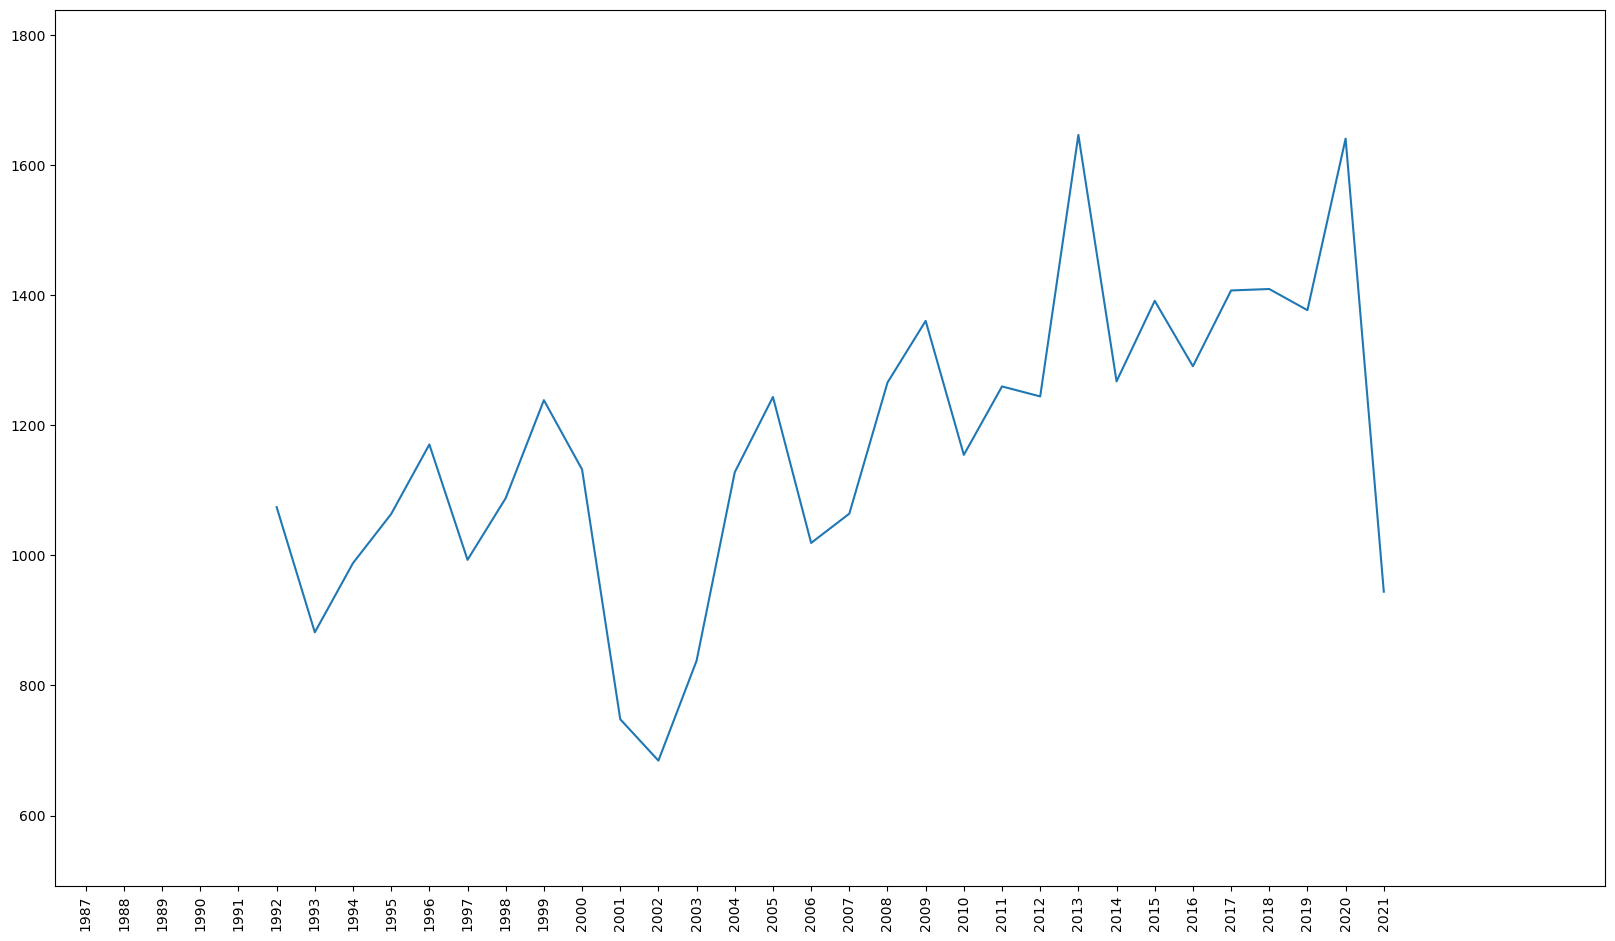

In [96]:

x = df_mean_all_by_year_Lentils['Year']
y = df_mean_all_by_year_Lentils['Lentils']
labels = df_mean_all_by_year_Lentils['Year']
  
plt.plot(x, y)
  
# You can specify a rotation for the tick
# labels in degrees or with keywords.
plt.xticks(x, labels, rotation ='vertical')
  
# Pad margins so that markers don't get 
# clipped by the axes
plt.margins(0.2)
  
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
plt.show()

## Which RM has the most yield?

In [60]:
df_sum_all_by_RM = df.groupby('RM').sum()
df_sum_all_by_RM.drop(labels=['Year'],axis=1,inplace=True)
df_sum_all_by_RM

,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
RM,,,,,,,,,,,,,,,,
1,987.74,1141.25,2004.79,12142.32,837.28,22240.6,3834.17,5416.00,942.5,3104.64,2066.88,6748.00,0.0,17.76,990.69,0.0
2,1071.35,1231.35,2131.45,15478.05,1330.98,18571.1,3930.55,13289.15,938.4,3171.45,1863.13,11665.90,0.0,18.60,1110.78,0.0
3,990.53,1178.63,2136.15,18923.30,1585.73,4961.0,3847.87,29272.72,871.6,3301.84,1889.35,24564.46,20.0,17.14,1094.23,14549.0
4,411.53,1020.25,1930.71,14225.78,1405.71,5931.0,3272.19,16270.48,756.7,2750.79,1277.41,9336.62,0.0,18.43,1016.35,0.0
5,431.17,900.84,1799.02,16161.28,1409.35,7250.0,2841.30,24055.67,751.1,2727.35,1062.20,6432.07,0.0,13.71,953.94,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,0.00,355.20,933.60,0.00,0.00,0.0,1769.50,0.00,0.0,1307.10,380.00,0.00,0.0,11.24,7.00,0.0
555,0.00,976.22,1631.05,0.00,0.00,0.0,3375.24,0.00,141.3,2065.69,179.00,0.00,0.0,16.73,142.00,0.0
561,0.00,1233.86,2251.76,0.00,11.00,0.0,3463.09,2530.00,731.9,2736.50,327.00,0.00,0.0,26.07,90.00,0.0


In [61]:
df_mean_all_by_RM = df.groupby('RM').mean()
df_mean_all_by_RM.drop(labels=['Year'],axis=1,inplace=True)
df_mean_all_by_RM

,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
RM,,,,,,,,,,,,,,,,
1,42.945217,21.947115,24.154096,758.895000,23.922286,1170.557895,45.644881,902.666667,32.500000,37.405301,27.195789,964.000000,0.000000,1.268571,12.383625,NaN
2,38.262500,23.679808,25.680120,814.634211,29.577333,1092.417647,46.792262,1107.429167,32.358621,37.755357,25.177432,972.158333,0.000000,1.328571,13.546098,NaN
3,43.066522,22.665962,25.430357,675.832143,30.494808,620.125000,45.807976,1009.404138,29.053333,39.307619,24.222436,1169.736190,6.666667,1.142667,13.026548,969.933333
4,37.411818,21.255208,22.984643,790.321111,27.032885,847.285714,40.397407,1251.575385,28.025926,32.747500,20.276349,933.662000,0.000000,1.228667,12.245181,NaN
5,33.166923,20.949767,21.416905,808.064000,27.102885,1035.714286,37.884000,1202.783500,30.044000,33.670988,17.413115,714.674444,0.000000,0.914000,11.493253,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,NaN,18.694737,17.615094,NaN,NaN,NaN,33.386792,NaN,NaN,26.675510,17.272727,NaN,NaN,1.405000,7.000000,NaN
555,NaN,22.702791,23.986029,NaN,NaN,0.000000,49.635882,NaN,35.325000,33.863770,22.375000,NaN,0.000000,1.394167,15.777778,NaN
561,NaN,24.677200,27.799506,NaN,11.000000,0.000000,53.278308,1265.000000,30.495833,40.843284,23.357143,NaN,0.000000,1.738000,12.857143,NaN


In [ ]:
df_sum_all_by_RM.plot()
df_mean_all_by_RM.plot()

## total column gets sum of all crops by RM

In [62]:
df_sum_all_by_RM['Total'] = df_sum_all_by_RM.sum(axis=1)
df_sum_all_by_RM

df_mean_all_by_RM['Total'] = df_mean_all_by_RM.mean(axis=1)
df_mean_all_by_RM

,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas,Total
RM,,,,,,,,,,,,,,,,,
1,42.945217,21.947115,24.154096,758.895000,23.922286,1170.557895,45.644881,902.666667,32.500000,37.405301,27.195789,964.000000,0.000000,1.268571,12.383625,NaN,271.032430
2,38.262500,23.679808,25.680120,814.634211,29.577333,1092.417647,46.792262,1107.429167,32.358621,37.755357,25.177432,972.158333,0.000000,1.328571,13.546098,NaN,284.053164
3,43.066522,22.665962,25.430357,675.832143,30.494808,620.125000,45.807976,1009.404138,29.053333,39.307619,24.222436,1169.736190,6.666667,1.142667,13.026548,969.933333,295.369731
4,37.411818,21.255208,22.984643,790.321111,27.032885,847.285714,40.397407,1251.575385,28.025926,32.747500,20.276349,933.662000,0.000000,1.228667,12.245181,NaN,271.096653
5,33.166923,20.949767,21.416905,808.064000,27.102885,1035.714286,37.884000,1202.783500,30.044000,33.670988,17.413115,714.674444,0.000000,0.914000,11.493253,NaN,266.352804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,NaN,18.694737,17.615094,NaN,NaN,NaN,33.386792,NaN,NaN,26.675510,17.272727,NaN,NaN,1.405000,7.000000,NaN,17.435694
555,NaN,22.702791,23.986029,NaN,NaN,0.000000,49.635882,NaN,35.325000,33.863770,22.375000,NaN,0.000000,1.394167,15.777778,NaN,20.506042
561,NaN,24.677200,27.799506,NaN,11.000000,0.000000,53.278308,1265.000000,30.495833,40.843284,23.357143,NaN,0.000000,1.738000,12.857143,NaN,124.253868


<AxesSubplot:xlabel='RM'>

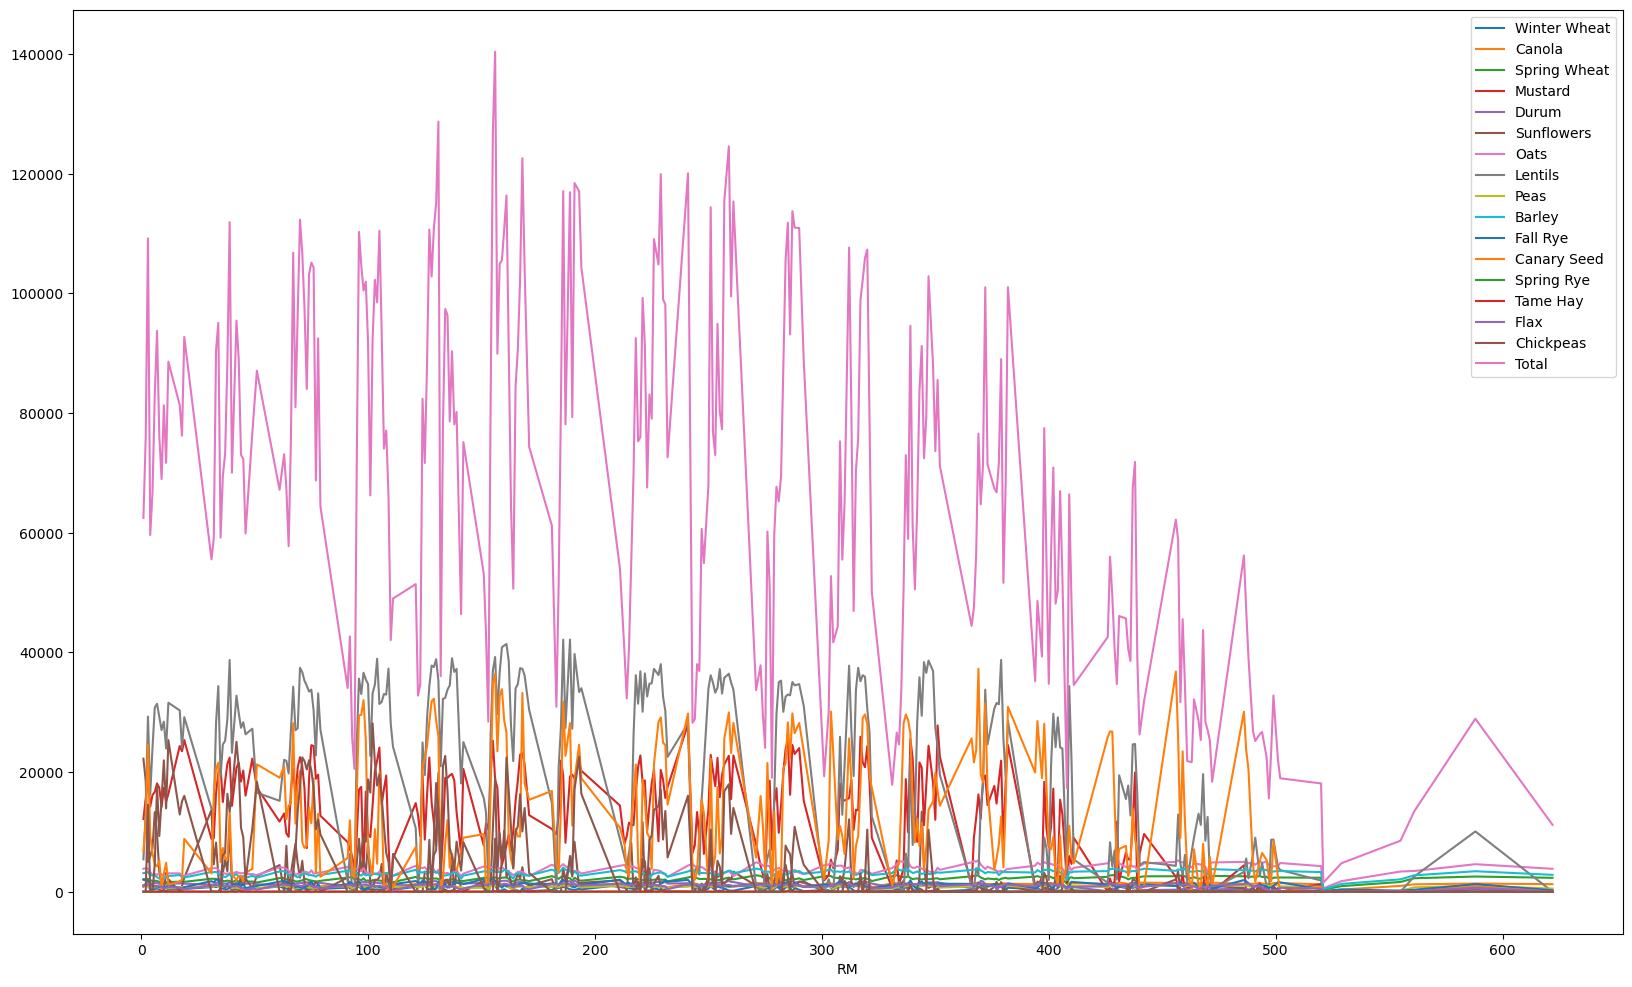

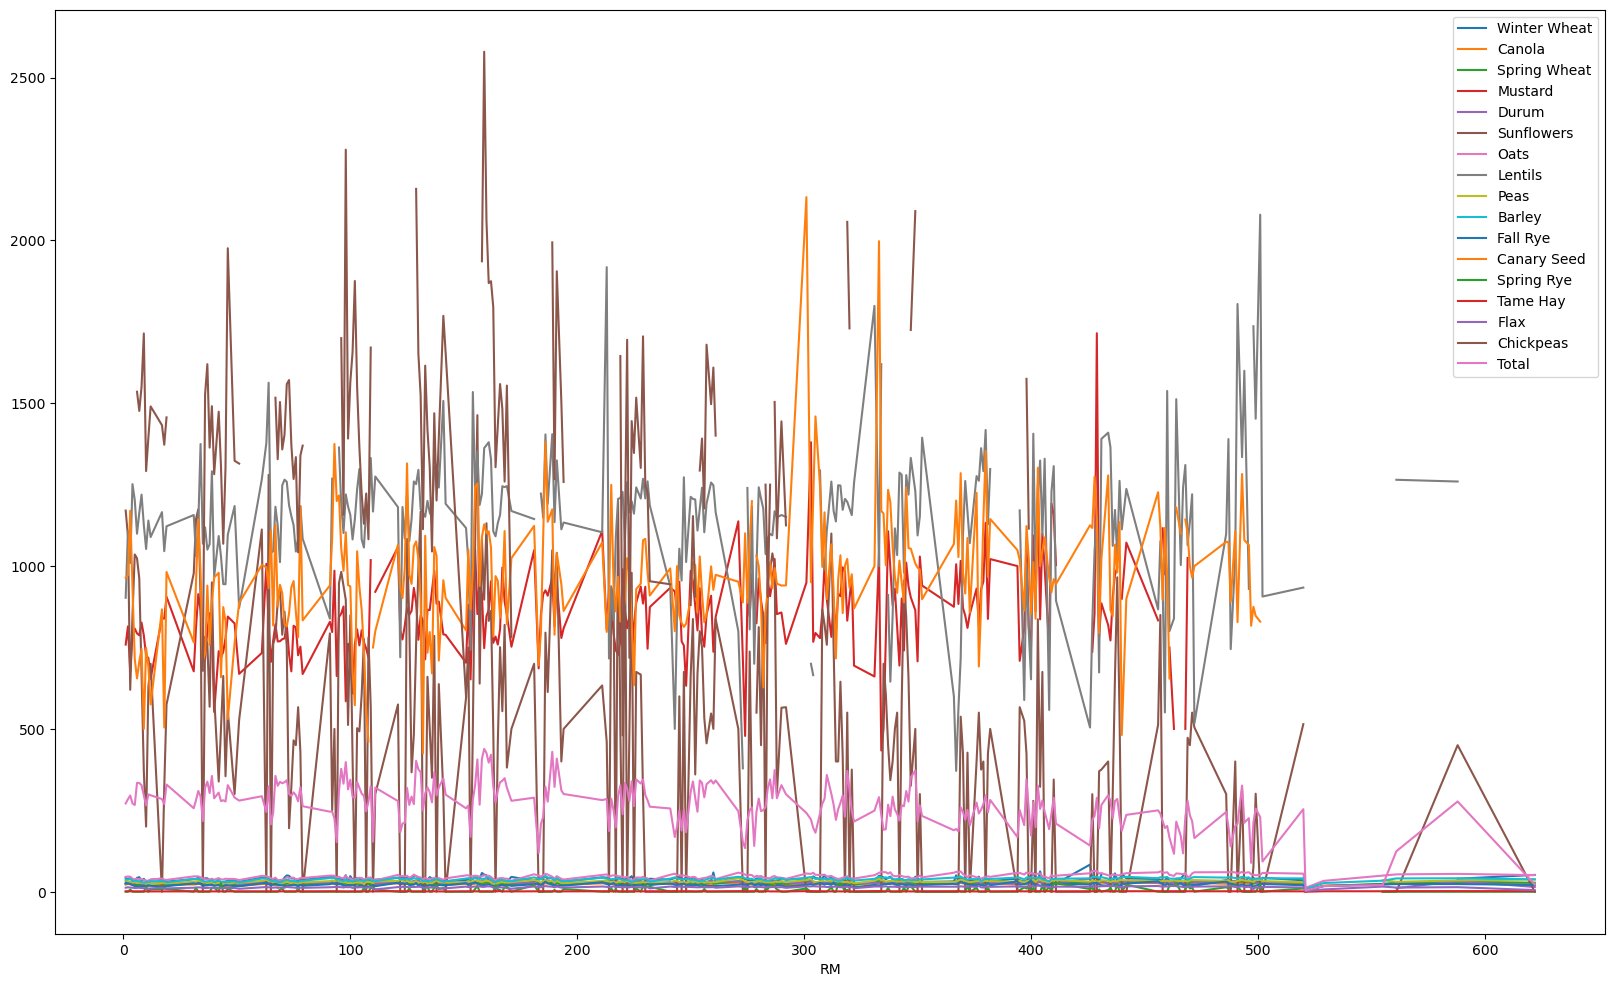

In [98]:
df_sum_all_by_RM.plot()
df_mean_all_by_RM.plot()

In [63]:
df_sum_all_by_RM.nlargest(10,'Total')

,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas,Total
RM,,,,,,,,,,,,,,,,,
156,1034.79,1355.45,2376.65,18760.00,1714.91,19024.0,4080.28,39226.46,997.9,3326.61,1830.21,36372.00,125.0,17.04,1281.38,8880.00,140402.68
131,877.14,900.35,2101.41,17818.30,1588.28,19850.0,3671.84,35228.89,858.6,3175.66,1669.20,26019.74,0.0,16.79,1243.15,13704.00,128723.35
155,1212.96,1326.52,2410.53,25239.22,1761.84,10689.7,4125.86,37008.67,1020.4,3583.26,2236.90,34771.88,25.0,19.99,1337.23,0.00,126769.96
259,196.20,1121.42,2364.72,22727.50,1801.87,2189.0,3428.68,36442.56,820.0,3528.50,892.00,29971.54,0.0,10.80,1134.34,17965.00,124594.13
168,514.65,949.94,1904.16,23178.42,1564.72,4097.0,3348.32,37271.04,863.1,2964.76,1446.59,33225.87,107.5,15.06,1077.33,10076.00,122604.46
241,1113.77,1314.63,2370.22,28000.00,1421.00,0.0,4377.91,28152.00,843.5,3381.17,1973.50,29782.62,0.0,18.21,1280.79,16050.00,120079.32
229,221.32,869.46,2013.97,20350.03,1594.43,600.0,3423.43,38041.66,866.0,3222.67,1376.90,29138.36,115.1,15.61,1041.33,17055.11,119945.38
191,310.60,1096.00,2336.41,18915.60,1876.43,8325.0,3484.74,39736.84,1004.5,3413.43,744.70,18720.30,0.0,12.05,1314.82,17148.00,118439.42
193,473.40,1036.98,1895.66,21818.35,1434.89,800.0,3310.48,33381.02,812.9,2725.21,1211.00,24560.96,0.0,16.41,1054.87,22576.62,117108.75


In [64]:
df_mean_all_by_RM.nlargest(10,'Total')

,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas,Total
RM,,,,,,,,,,,,,,,,,
159,52.380000,25.907143,27.826310,747.916667,34.952885,896.916667,50.645556,1362.461667,32.390000,39.899048,20.856250,1128.259667,0.000000,1.105714,14.942024,2579.500000,438.497475
189,43.711111,25.705227,26.847262,963.230000,33.649423,1048.820000,45.978025,1405.049000,33.496552,40.777262,20.814211,1174.218333,0.000000,1.211538,15.421728,1994.000000,429.558105
160,50.420000,25.701739,28.210595,846.171429,35.040962,1131.466667,48.029744,1371.161000,34.421429,43.137024,21.012963,1101.031538,0.000000,1.359231,16.193049,2061.250000,425.912961
162,NaN,27.303929,25.588690,953.606000,32.788462,862.500000,45.398267,1327.981034,29.176923,38.828415,19.222222,1057.725000,0.000000,0.912143,16.016301,1874.777778,420.788344
191,38.825000,25.488372,27.814405,945.780000,36.085192,1040.625000,47.736164,1324.561333,33.483333,41.125663,19.094872,1040.016667,0.000000,1.095455,15.841205,1905.333333,408.931625
158,57.633333,25.327391,26.239762,913.910000,32.463077,1082.511111,47.491707,1221.316667,30.106667,39.232262,19.659298,1089.207333,0.000000,1.399286,14.958916,1936.000000,408.591051
156,41.391600,25.574528,28.293452,852.727273,32.979038,1463.384615,48.574762,1352.636552,33.263333,39.602500,24.732568,1254.206897,17.857143,1.217143,15.626585,1268.571429,406.289964
129,48.052500,26.136571,25.957976,887.776923,33.852115,761.237500,47.459615,1251.770333,32.796429,39.640361,26.714286,1075.648333,0.000000,0.973571,14.752857,2158.250000,401.938711
98,50.625000,24.282432,26.781905,584.740000,32.446154,896.333333,49.062625,1220.087667,29.321429,38.135000,19.350000,1103.964138,0.000000,0.791667,14.551667,2278.750000,398.076438


In [ ]:
gpd.GeoDataFrame(pd.merge(
    df_sum_all_by_RM,
    gdf,
    on='RM'
)).explore(
    column='Total',
    tooltip=['Municipality', 'Total']
)

## Lentils

In [65]:
# Average lentil crop year in the latest 10 years
df_mean_all_by_year_Lentils.sort_values('Year',ascending=False).head(10)

,Year,Lentils
83,2021,944.221649
82,2020,1640.985075
81,2019,1377.128342
80,2018,1409.682292
79,2017,1407.444976
78,2016,1290.928870
77,2015,1391.476517
76,2014,1267.646387
75,2013,1646.625000
74,2012,1244.508982


## Show RM with average Lentils yield

In [ ]:
gpd.GeoDataFrame(pd.merge(
    df_mean_all_by_RM,
    gdf,
    on='RM'
)).explore(
    column='Lentils', tooltip = ['Municipality','Lentils']
)

# Cluster Canola data for latest 10 years

In [66]:
df['Year'].unique()

array([1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [67]:
new_df = df[df['Year']>=2012]
new_df.reset_index(inplace=True)
new_df

,index,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,74,2012,1,54.00,22.30,36.20,NaN,NaN,NaN,54.70,NaN,29.0,53.80,51.80,NaN,NaN,NaN,18.00,NaN
1,75,2013,1,47.10,32.10,47.40,1125.00,NaN,NaN,58.70,NaN,38.2,73.70,NaN,NaN,NaN,NaN,30.20,NaN
2,76,2014,1,43.30,26.21,NaN,476.02,NaN,0.0,59.69,NaN,36.8,52.08,39.23,NaN,0.0,0.0,18.23,NaN
3,77,2015,1,47.48,28.65,34.32,NaN,29.18,NaN,56.36,NaN,37.7,50.96,41.64,NaN,NaN,NaN,16.07,NaN
4,78,2016,1,60.60,32.10,40.50,169.00,38.40,NaN,75.70,728.0,26.2,68.10,58.50,NaN,NaN,NaN,24.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,25012,2017,622,NaN,43.06,59.49,NaN,NaN,NaN,93.01,NaN,43.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2946,25013,2018,622,NaN,39.30,59.50,NaN,NaN,NaN,96.40,NaN,43.0,54.00,NaN,NaN,NaN,NaN,NaN,NaN
2947,25014,2019,622,NaN,46.10,63.90,NaN,NaN,NaN,106.00,NaN,33.7,73.90,NaN,NaN,NaN,NaN,NaN,NaN
2948,25015,2020,622,NaN,40.90,55.10,NaN,NaN,NaN,94.50,NaN,49.2,74.30,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
new_df['RM'].unique().size

295

In [69]:
new_df[new_df['Canola'].isna()]['RM'].unique().size

11

In [70]:
new_df[new_df['Canola'].isna()]['RM'].unique()

array([  9,  17,  18,  44,  45,  46,  76, 110, 141, 279, 470])

In [71]:
new_df[new_df['Canola'].isna()]

,index,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
83,749,2015,9,NaN,NaN,23.72,604.15,28.70,NaN,NaN,1113.67,22.8,NaN,NaN,NaN,NaN,NaN,12.82,NaN
84,750,2016,9,NaN,NaN,NaN,1142.00,43.50,NaN,69.20,1773.00,43.0,NaN,NaN,NaN,NaN,NaN,22.00,2254.00
120,1082,2012,17,NaN,NaN,32.10,671.00,35.00,NaN,NaN,1198.00,24.6,42.20,NaN,NaN,NaN,NaN,20.00,NaN
121,1083,2013,17,80.00,NaN,42.50,1016.00,47.20,NaN,77.50,1477.00,34.6,69.80,NaN,NaN,NaN,NaN,38.30,2889.00
122,1084,2014,17,41.23,NaN,35.32,1094.11,43.02,0.0,NaN,1875.29,38.6,49.77,NaN,1250.01,0.0,0.0,27.80,2220.00
130,1166,2012,18,NaN,NaN,29.30,782.00,33.90,NaN,NaN,787.00,26.6,39.00,NaN,NaN,NaN,NaN,NaN,988.00
132,1168,2014,18,56.77,NaN,29.16,1166.03,34.39,0.0,NaN,1724.00,37.3,54.75,NaN,NaN,0.0,0.0,27.32,NaN
133,1169,2015,18,NaN,NaN,20.52,970.28,34.55,NaN,86.05,856.56,35.9,33.25,NaN,NaN,NaN,NaN,13.61,1766.12
134,1170,2016,18,NaN,NaN,25.20,1128.00,43.50,NaN,NaN,1289.00,32.8,63.40,NaN,300.00,NaN,NaN,NaN,2361.00
135,1171,2017,18,NaN,NaN,8.27,658.15,22.39,NaN,NaN,819.59,17.2,29.70,NaN,NaN,NaN,NaN,NaN,1062.31


In [72]:
new_df.isna().sum()

index              0
Year               0
RM                 0
Winter Wheat    1976
Canola            45
Spring Wheat      51
Mustard         1969
Durum           1164
Sunflowers      2655
Oats             613
Lentils          979
Peas             103
Barley            91
Fall Rye        2334
Canary Seed     1965
Spring Rye      2655
Tame Hay        2655
Flax             706
Chickpeas       2406
dtype: int64

In [73]:
new_df.describe()

,index,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
count,2950.000000,2950.000000,2950.000000,974.000000,2905.000000,2899.000000,981.000000,1786.000000,295.0,2337.000000,1971.000000,2847.000000,2859.000000,616.000000,985.000000,295.0,295.0,2244.000000,544.000000
mean,12468.361017,2016.500000,247.298305,44.018183,34.537115,42.008537,803.999062,39.677105,0.0,76.180578,1363.198554,34.887496,57.244921,38.417679,1166.146305,0.0,0.0,22.920829,1568.299945
std,7201.789809,2.872768,148.244294,12.858777,9.265391,12.039952,291.831747,12.267339,0.0,27.547503,433.178671,10.689126,17.999097,14.513914,413.403686,0.0,0.0,7.402390,618.703651
min,74.000000,2012.000000,1.000000,5.000000,4.000000,3.300000,64.000000,1.700000,0.0,2.370000,46.000000,2.700000,1.300000,6.690000,6.000000,0.0,0.0,1.400000,31.000000
25%,6213.250000,2014.000000,123.000000,35.000000,28.300000,34.380000,613.000000,32.647500,0.0,57.600000,1076.500000,27.600000,45.400000,28.380000,913.000000,0.0,0.0,18.300000,1200.000000
50%,12425.500000,2016.500000,246.000000,43.760000,35.600000,42.310000,784.000000,40.000000,0.0,75.700000,1367.000000,35.300000,59.280000,37.000000,1157.230000,0.0,0.0,23.095000,1563.000000
75%,18709.750000,2019.000000,369.000000,52.280000,41.250000,50.000000,986.000000,47.500000,0.0,95.000000,1631.000000,42.400000,70.500000,46.925000,1446.000000,0.0,0.0,27.400000,1922.000000
max,25016.000000,2021.000000,622.000000,90.000000,57.930000,198.000000,2500.000000,85.370000,0.0,165.100000,3411.000000,86.800000,105.940000,108.000000,2727.000000,0.0,0.0,110.000000,5400.000000


<AxesSubplot:>

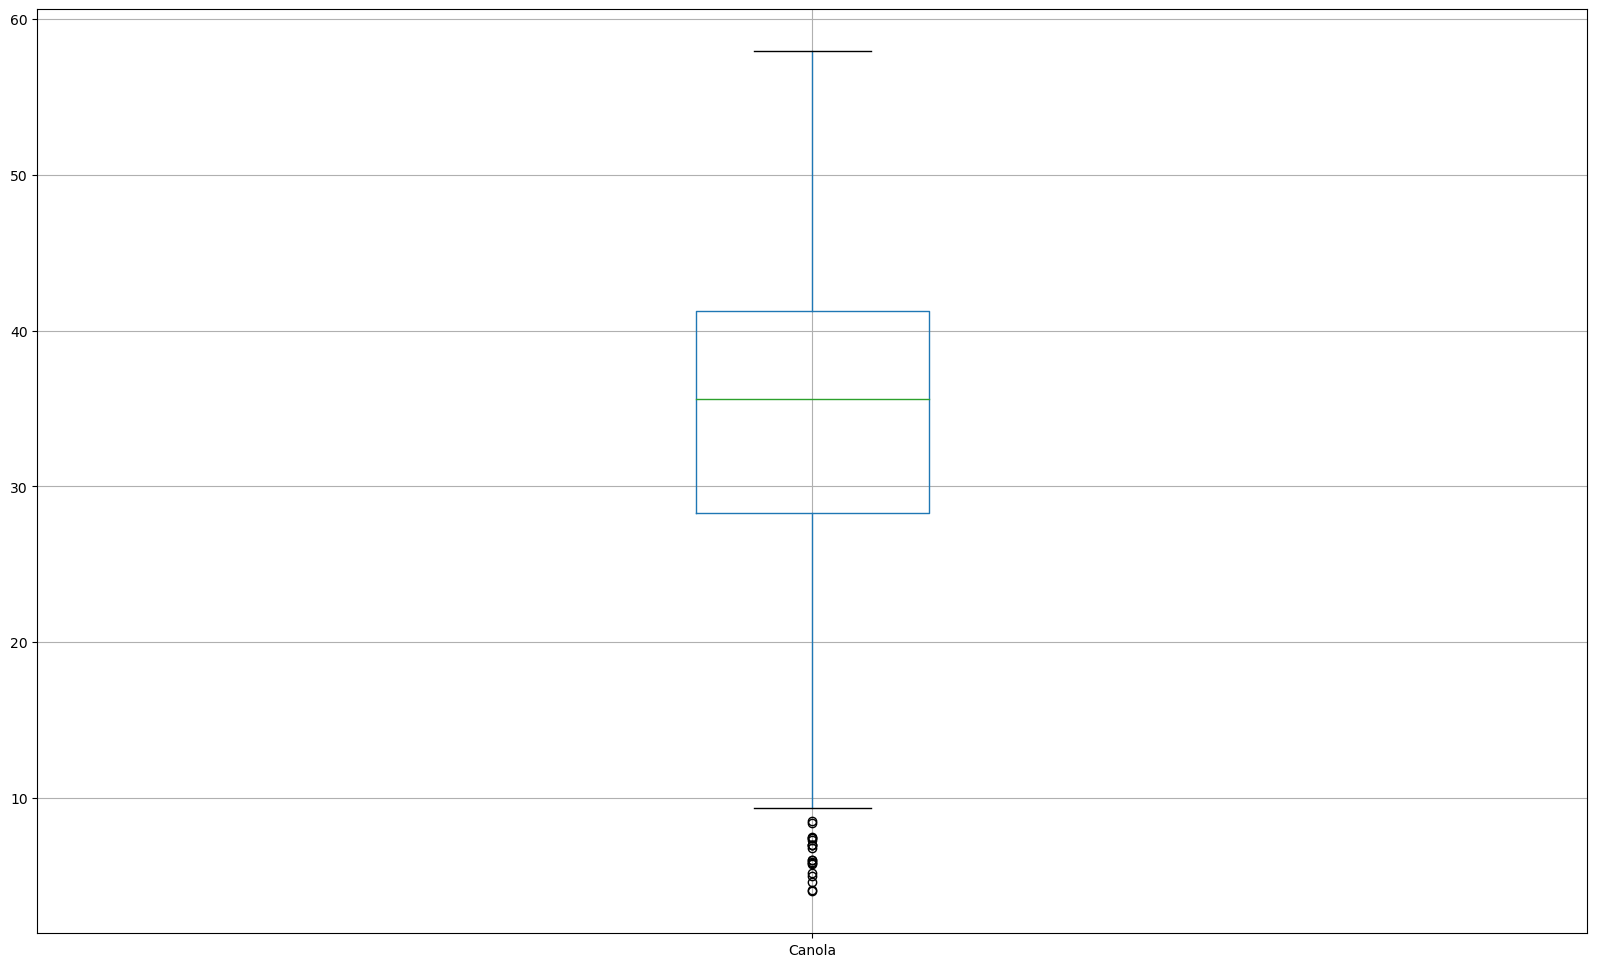

In [99]:
new_df.boxplot(column='Canola', return_type='axes')

In [ ]:
sb.displot(new_df['Canola'])

In [ ]:
sb.heatmap(
    new_df.corr(),
    annot=True)

In [ ]:
df_mean=new_df.groupby(['RM'])['Canola'].mean()\
    .to_frame()

In [76]:
df_std=new_df.groupby(['RM'])['Canola'].std()\
    .to_frame()

In [77]:
new_df.groupby('RM')['Year'].count()\
    .to_frame()\
        .sort_values('Year')

,Year
RM,
1,10
333,10
331,10
322,10
321,10
...,...
154,10
153,10
152,10


In [78]:
df_mean.reset_index(inplace=True)
df_std.reset_index(inplace=True)

In [79]:
df_ms=pd.merge(
    df_mean.rename(columns={'Canola': 'MeanYield'}),
    df_std.rename(columns={'Canola': 'StdYield'}),
    on='RM'
)

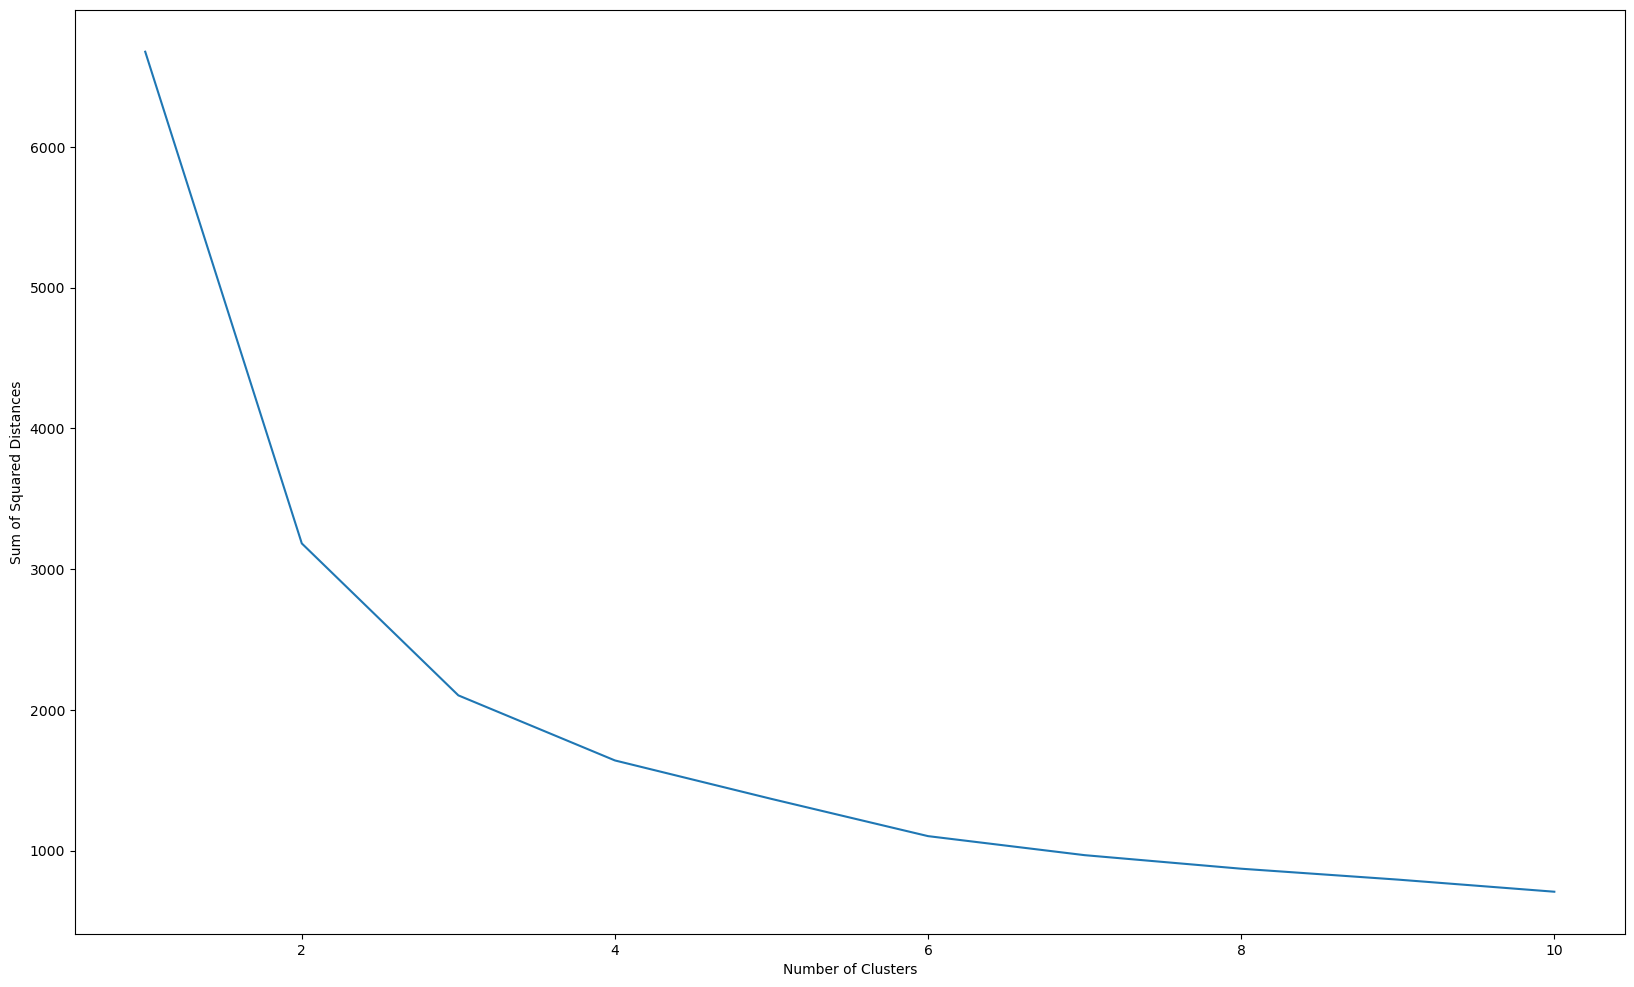

In [80]:
from sklearn.cluster import KMeans

# Define the features to be used for clustering
X = df_ms[['MeanYield', 'StdYield']]

# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
# Plot the elbow graph
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

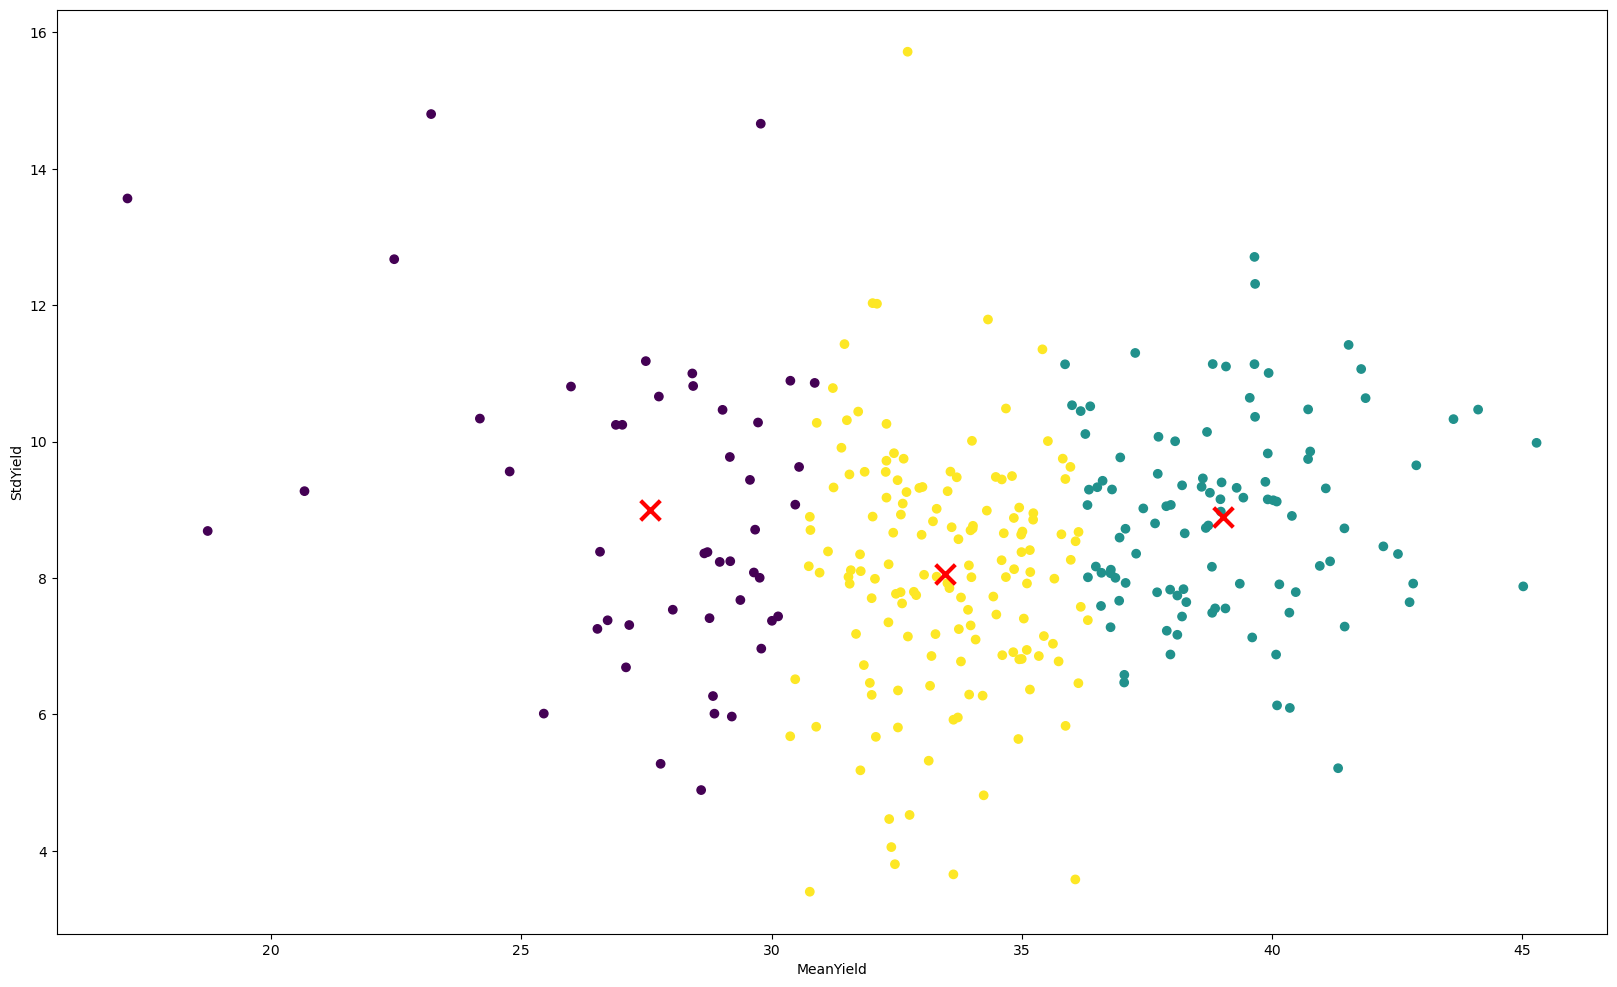

In [81]:
# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Predict the cluster labels for each data point
labels = kmeans.predict(X)

# Plot the data points and cluster centers
plt.scatter(X['MeanYield'], X['StdYield'], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('MeanYield')
plt.ylabel('StdYield')
plt.show()

In [82]:
df_ms['Labels']=labels

In [83]:
df_ms.groupby('Labels').mean()\
    .sort_values('MeanYield')

,RM,MeanYield,StdYield
Labels,,,
0,99.234043,27.577639,8.995679
2,225.531034,33.460156,8.051921
1,345.504854,39.023019,8.889548


In [84]:
df_ms.replace(to_replace={
    0:1,
    1:2,
    2:0}, inplace=True
)

In [ ]:
pd.merge(
    gdf[['RM', 'geometry']],
    df_ms,
    on='RM'
    ).explore(
        column='Labels', # column you want to visualize
        cmap='YlGn', # color on the map
        k=3, # number of colors. We have 3 clusters
        scheme='naturalbreaks', #How your legened will look like
        tiles='Stamen Terrain', # map background type
        tooltip=['RM', 'MeanYield', 'Labels'] # what to show when you hover around your mouse
    )

## drop rows with null Canola values

In [ ]:
new_df = new_df.dropna(axis=0, subset=['Canola'])
new_df

In [ ]:
new_df.isna().sum()

In [ ]:
new_df.boxplot(column='Canola', return_type='axes')

# Spring Wheat and Barley

In [86]:
df_SpringWheat = df.groupby('Year')['Spring Wheat'].mean()
df_Barley = df.groupby('Year')['Barley'].mean()

In [87]:
df_SpringWheat.info()

<class 'pandas.core.series.Series'>
Int64Index: 84 entries, 1938 to 2021
Series name: Spring Wheat
Non-Null Count  Dtype  
--------------  -----  
84 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [ ]:
df_SpringWheat.plot()


In [ ]:
sb.lineplot(data=df_SpringWheat)

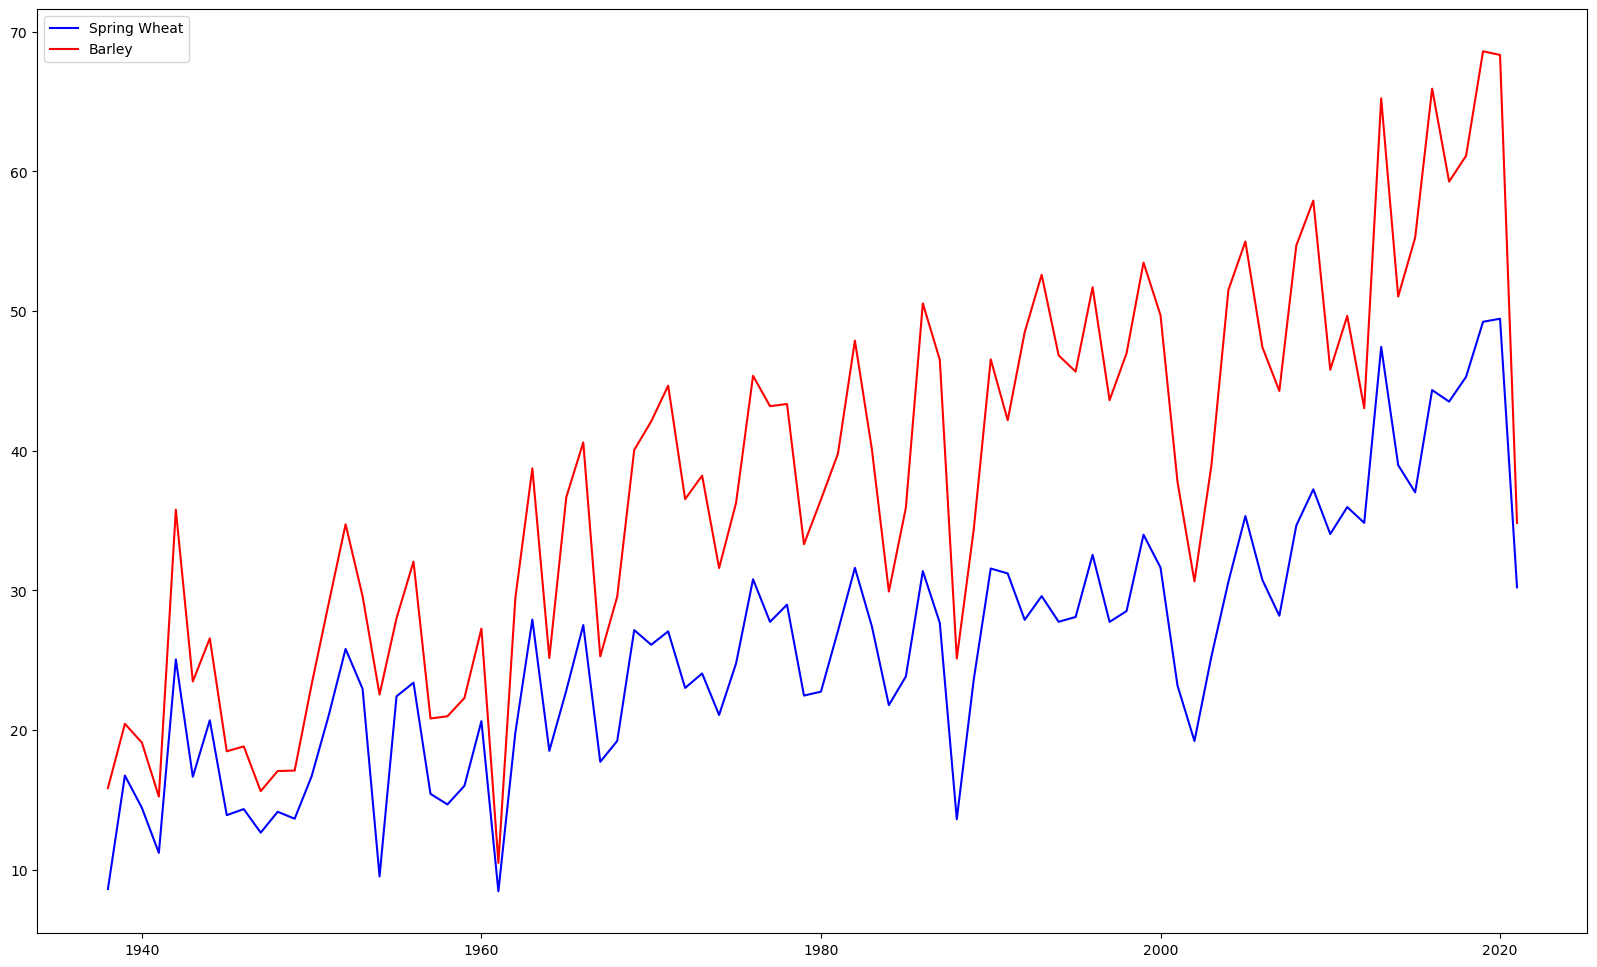

In [90]:
plt.plot(df_SpringWheat, color="blue",label="Spring Wheat")
plt.plot(df_Barley, color="red", label="Barley")
plt.legend(loc="best")

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

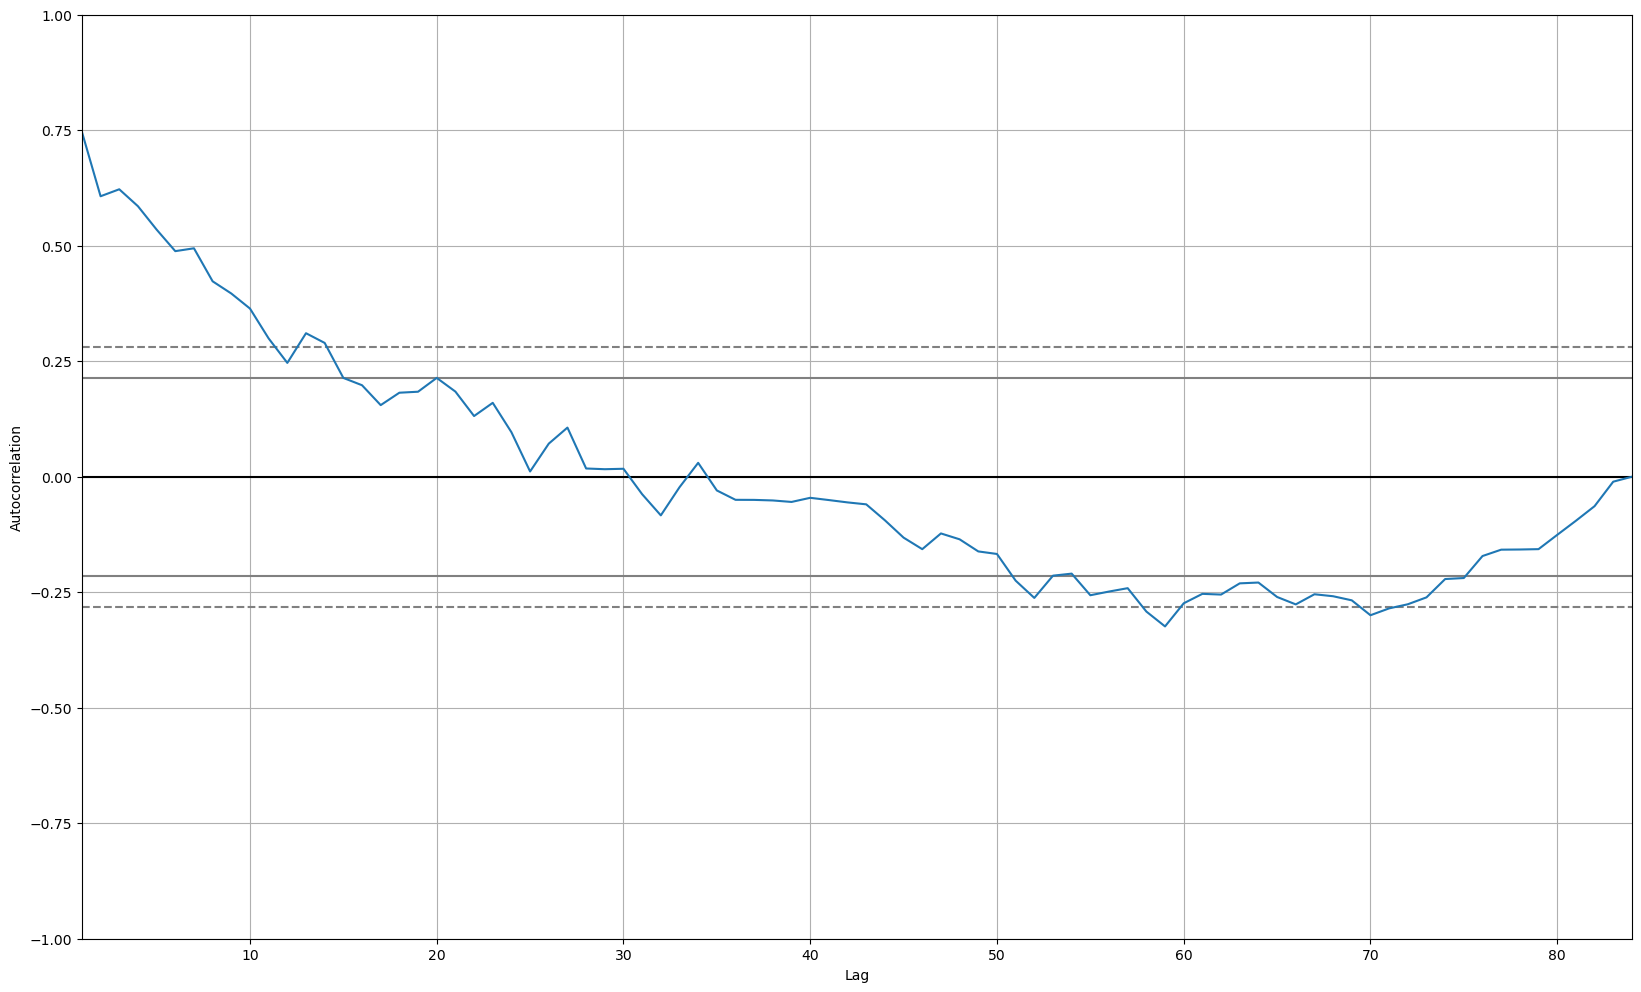

In [91]:
pd.plotting.autocorrelation_plot(df_SpringWheat)